In [ ]:
"""
Loading necessary libraries and model
"""
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


model = ResNet50(weights='imagenet')

In [ ]:
# getting the list of images inside the data 
import os 

os.chdir("/content/drive/Shareddrives/ComED Codes and Data/Keras ")

data_dir = os.getcwd()

files =os.listdir(data_dir + "/temp")

# files

['test.jpg',
 'Copy of gsv_4.jpg',
 'Copy of gsv_3.jpg',
 'Copy of gsv_1.jpg',
 'Copy of gsv_0.jpg',
 'Copy of gsv_5.jpg']

In [ ]:
"""
Finding objects in the image for further analysis
"""
model_dict = {}

for ele in files:
  img_path = data_dir + '/temp/'+ ele
  img = image.load_img(img_path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  # decode the results into a list of tuples (class, description, probability)
  # (one such list for each sample in the batch)
  # decode_predictions(preds, top=20)[0]

  model_dict[ele] = decode_predictions(preds, top=20)[0]
  # Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

# Distribution approach 

Now, we will generate a image and objects dictionary to get a sense of what other objects are detected in the image. 

In [ ]:

image_dict = {}
for key, value in model_dict.items():
  # print(value)
  temp = [] 
  for k in value:
    # print(k[1])
    temp.append(k[1])
  image_dict[key] = ', '.join(temp)

image_dict

{'Copy of gsv_0.jpg': 'fountain, stupa, fireboat, chainlink_fence, quill, greenhouse, alp, radio_telescope, lakeside, brass, planetarium, palace, bubble, mosque, prison, mobile_home, solar_dish, picket_fence, hourglass, church',
 'Copy of gsv_1.jpg': 'fountain, recreational_vehicle, mobile_home, chainlink_fence, stupa, radio_telescope, fireboat, picket_fence, balloon, trailer_truck, lakeside, parachute, car_mirror, trolleybus, minivan, suspension_bridge, solar_dish, obelisk, greenhouse, liner',
 'Copy of gsv_3.jpg': 'alp, stupa, trolleybus, car_mirror, thatch, church, picket_fence, pole, volcano, valley, mailbox, solar_dish, prison, barn, viaduct, minivan, monastery, suspension_bridge, greenhouse, unicycle',
 'Copy of gsv_4.jpg': 'crane, prison, stupa, pole, trolleybus, streetcar, solar_dish, alp, cab, chainlink_fence, traffic_light, patio, unicycle, parking_meter, moving_van, crutch, street_sign, motor_scooter, dock, shopping_cart',
 'Copy of gsv_5.jpg': 'alp, stupa, prison, suspensio

In [ ]:
"""
Function to calculate the jaccard similarity for image x image 
"""

def jaccard(image1_objs, image2_objs):
  list1, list2 = image1_objs.split(","),image2_objs.split(",")
  intersection = len(list(set(list1).intersection(list2)))
  union = (len(list1) + len(list2)) - intersection
  return float(intersection) / union

# Matrix of image x image jaccard similarity.

Here, we have made an image x image matrix with their corresponding jaccard similarity. 

# write a function which gererates image x image matrix with lower left triangle of the matrix as zeroes. 

# Or maybe write a function which takes in all the similarity measures of image x image and save it into a list

# write a function which plots the KDE plot for upper right triangle of the matrix.

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

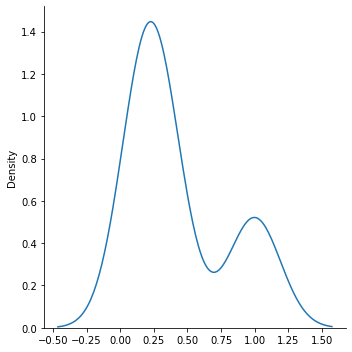

In [ ]:
sns.displot(data = li,kind="kde")
plt.show()